# <center><font size="6" color="#007bff">AMHARIC HEALTHCARE QUESTION AND ANSWERING SYSTEM</font><br></center>



## <font size="3" color="#007bff">General Objective:</font>
The general objective of this thesis is to design deep learning based Amharic Question Answering system for healthcare domain.

# <font color="#007bff"><b>1- Import Dependencies</b></font>


In [1]:
import tensorflow as tf
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import LSTM
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.metrics import accuracy_score
from keras.layers import Bidirectional, Embedding, Dropout, Dense, LSTM
from keras.preprocessing import sequence
from keras.preprocessing import text
from keras.models import load_model
import matplotlib.pyplot as plt
from collections import Counter 
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import regularizers
from sklearn.metrics import classification_report

#import hm

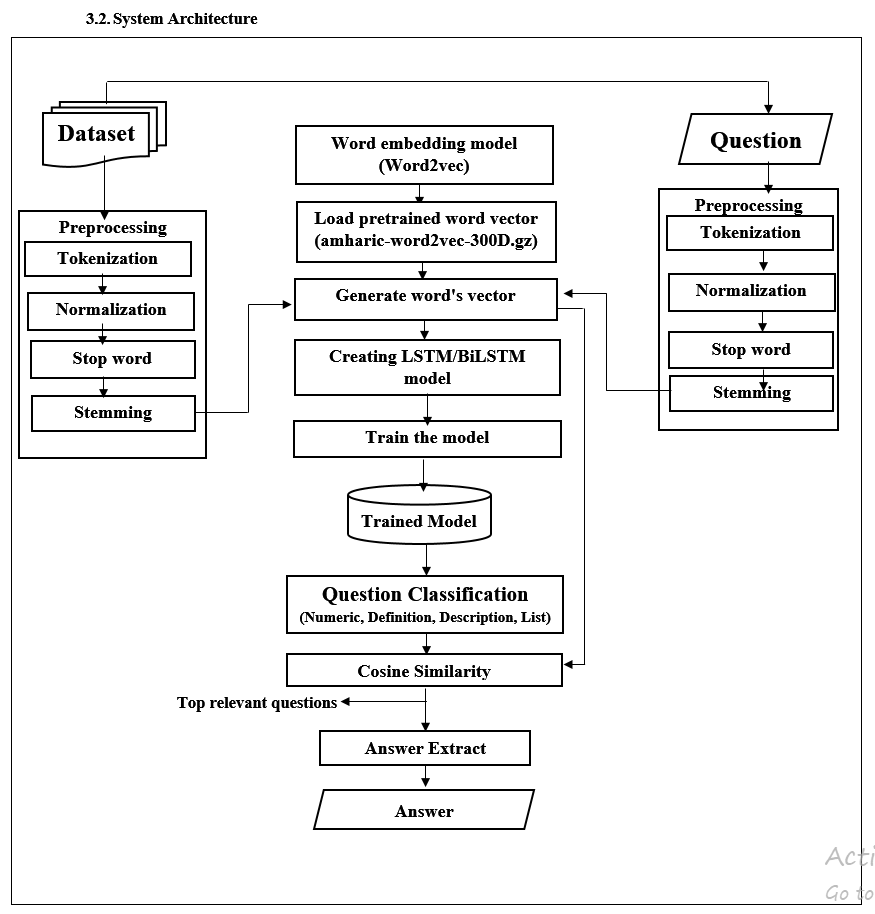

In [2]:
from IPython.display import Image
Image("System_architecture.png")

# <font color="#007bff"><b>2- Read Training dataset</b></font>

In [168]:
train_data=pd.read_excel(r"data/train_data.xlsx")
print(len(train_data))
train_data

1469


Question         Category  label  \
0                           ሃዮይድ ማለት ምን ማለት ነዉ?       Definition      0   
1           የድህረ ወሊድ መደበት ጤና እክል ማለት ምን ማለት ነዉ?       Definition      0   
2                   የኮሮናቫይረስ በሽታ ማለት ምን ማለት ነዉ?       Definition      0   
3                              ቫይታሚን ዲ ምንድን ነዉ?      Description      1   
4                           ቫይታሚን ዲ ከየት እናገኛለን?      Description      1   
...                                         ...              ...    ...   
1464                   የኩላሊት ጠጠር ማለት ምን ማለት ነዉ?       Definition      0   
1465  ለመድኃኒት አለርጂ የጤና ባለሙያ ዕርዳታ የሚያስፈልገን መቸ ነው?  Factoid_numeric      2   
1466      አንድ ሰዉ የሚጥል በሽታ አለዉ ተብሎ የሚወሰነዉ መቸ ነዉ?  Factoid_numeric      2   
1467              የኩላሊት ጠጠር ሕመም ምልክቶች ምንምን ናቸዉ?             List      3   
1468                      የጆሮ ኢንፌክሽን ምልክቶች ዘርዝር             List      3   

                                                 Answer  
0     አንድ አጥንት ከሌላ ተዛምጅ አጥንት ጋር ይገጣጣማሉ ነገር ግን በሰውነታች...  
1     ልጅ ወልደሽ በተገላገልሽበት ወቅት ብዙ የስሜት መቀያየሮች ሊኖር እና ሊያ...  
2     የኮሮናቫይረስ በሽታ (ኮቪድ-19) ከቀላል እስከ ከባድ የመተንፈሻ አካል ...  
3     ቫይታሚን ዲ በሽታ የመከላከል አቅምን ለማሳደግ፣ የህዋሳት እድገትን ለማፋ...  
4     የፀሃይ ብርሃን በማግኘት እና አመጋገባችን በማስተካከል ቫይታሚን ዲ ማግኘ...  
...                                                 ...  
1464  የኩላሊት ጠጠር ማለት በኩላሊትዎ ውስጥ ከሚፈጠሩ ማዕድናት እና ጨዎች የተ...  
1465  እንደ ትኩሳት፣ ማስመለስ የመሳሰሉት ምልክቶች ከታየብዎት ወዲያውኑ ወደ ጤ...  
1466  አንድ ሰዉ የምጥል በሽታ አለዉ ተብሎ የሚወሰነዉ የነርቭ መታወክ ቢያንስ ...  
1467  ከፍተኛ የጎን የሕመም ስሜት እና ከጎድን አጥንት በታች የጀርባ ሕመም ስሜት\n  
1468               ከተለምድ የበዛ ለቅሶ፣ብስጭት፣እንቅልፍ ማጣት፣የጆሮ ህመም  

[1469 rows x 4 columns]

SHAPE OF DATASET:  (1469, 4) 

COLUMNS IN DATASET:  Index(['Question', 'Category', 'label', 'Answer'], dtype='object') 

CATEGORIES:  ['Definition' 'Description' 'List' 'Factoid_numeric'] 


NUMBER OF QUESTIONS IN EACH CATEGORY: 



C:\MSC\envs\tf\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Category', ylabel='count'>

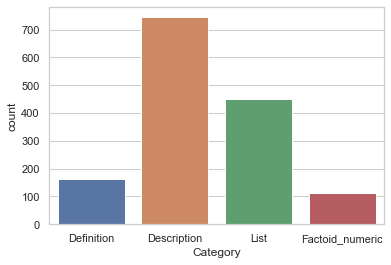

In [169]:
# Description of the dataset
#counting Q types
print('SHAPE OF DATASET: ', train_data.shape, '\n\nCOLUMNS IN DATASET: ', train_data.columns, '\n\nCATEGORIES: ', train_data.Category.unique(), '\n\n')

# Plotting number of samples within each category
print('NUMBER OF QUESTIONS IN EACH CATEGORY: \n')
sns.set(style = 'whitegrid')
sns.countplot(train_data.Category)

# <font color="#007bff"><b>3- Preprocessing</b></font>

1. Tokenization
2. Normalization
3. Stop word Removal
4. Stemming 

In [170]:
#   %%time
import pre_process as stem

string_data = train_data.values.tolist()
processed=stem.per_process(string_data)
#print(processed)
df=pd.DataFrame(string_data) #convert list back to pandas dataframe
df.shape
#df_col_len = int(train_data['new'].str.encode(encoding='utf-8').str.len().max())

df[0]

train_data = df.rename(columns={0: 'Question', 1: 'Category', 2: 'label', 3: 'Answer'})
train_data

Question         Category  label  \
0                          ሀዮይድ ማለት ምን ማለት       Definition      0   
1          የድህረ ወሊድ መደበት ጤና እክል ማለት ምን ማለት       Definition      0   
2                  የኮሮናቫይረሥ በሽታ ማለት ምን ማለት       Definition      0   
3                             ቫይታሚን ዲ ምንድን      Description      1   
4                       ቫይታሚን ዲ ከየት እናገኛለን      Description      1   
...                                    ...              ...    ...   
1464                  የኩላሊት ጠጠር ማለት ምን ማለት       Definition      0   
1465   ለመድሀኒት አለርጂ የጤና ባለሙያ እርዳታ ያሥፈልገን መቸ  Factoid_numeric      2   
1466       አንድ ሠዉ የሚጥል በሽታ አለዉ ተብሎ ወሠነዉ መቸ  Factoid_numeric      2   
1467          የኩላሊት ጠጠር ህመም ምልክቶች ምንምን ናቸዉ             List      3   
1468                 የጆሮ ኢንፌክሽን ምልክቶች ዘርዝር             List      3   

                                                 Answer  
0     አንድ አጥንት ከሌላ ተዛምጅ አጥንት ጋር ይገጣጣማሉ ነገር ግን በሰውነታች...  
1     ልጅ ወልደሽ በተገላገልሽበት ወቅት ብዙ የስሜት መቀያየሮች ሊኖር እና ሊያ...  
2     የኮሮናቫይረስ በሽታ (ኮቪድ-19) ከቀላል እስከ ከባድ የመተንፈሻ አካል ...  
3     ቫይታሚን ዲ በሽታ የመከላከል አቅምን ለማሳደግ፣ የህዋሳት እድገትን ለማፋ...  
4     የፀሃይ ብርሃን በማግኘት እና አመጋገባችን በማስተካከል ቫይታሚን ዲ ማግኘ...  
...                                                 ...  
1464  የኩላሊት ጠጠር ማለት በኩላሊትዎ ውስጥ ከሚፈጠሩ ማዕድናት እና ጨዎች የተ...  
1465  እንደ ትኩሳት፣ ማስመለስ የመሳሰሉት ምልክቶች ከታየብዎት ወዲያውኑ ወደ ጤ...  
1466  አንድ ሰዉ የምጥል በሽታ አለዉ ተብሎ የሚወሰነዉ የነርቭ መታወክ ቢያንስ ...  
1467  ከፍተኛ የጎን የሕመም ስሜት እና ከጎድን አጥንት በታች የጀርባ ሕመም ስሜት\n  
1468               ከተለምድ የበዛ ለቅሶ፣ብስጭት፣እንቅልፍ ማጣት፣የጆሮ ህመም  

[1469 rows x 4 columns]

In [171]:
with open('preprocessed_training_data.txt', 'w', encoding='utf-8') as f:
    for item in processed:
        f.write(f'{item}\n')
print('Preprocessed_data Saved!')


Preprocessed_data Saved!


# <font color="#007bff"><b>4- Read Testing dataset</b></font>

In [172]:
data_t = pd.read_excel(r'data/test_data.xlsx')
print(len(data_t))
data_t

331


Question         Category  label  \
0                       የአእምሮ ጤና ማለት ምን ማለት ነዉ?        Definition      0   
1    የአንድ ጤነኛ ሰዉ ትክክለኛ የደም ዉስጥ የስኳር መጠን ስንት ነዉ?   Factoid_numeric      2   
2                 ልጆች ስንት ወር ጡት ብቻ እንዲወስዱ ይመከራል?  Factoid_numeric      2   
3                          የደም ግፊት መንስኤ ምንድን ነዉ?      Description      1   
4                       የአዕምሮ ህመም ማለት ምን ማለት ነዉ?       Definition      0   
..                                           ...              ...    ...   
326                ኤች.አይ.ቪ የማይተላለፍባቸው መንገዶች ዘርዝር             List      3   
327         ደም ግፊት ካለብን ተመራጭ ያልሆኑ ምግቦች ምንምን ናቸዉ?             List      3   
328                   የአልማዝ ባለጭራ ምልክቶች ምንምን ናቸዉ?             List      3   
329                         ታይፎይድ መንስኤዉ ምንድን ነዉ?      Description      1   
330                    የታይፎይድ በሽታ ህክምናዉ ምንድን ነዉ?      Description      1   

                                                Answer  
0    የአእምሮ ጤና ማለት እምቅ ችሎታን ለማውጣት፤ በስራ ውጤታማ ለመሆን፤ ለማ...  
1                                ከ70 ሚግ እስከ 100 ሚሊ ግራም  
2    ጤናማ ህፃናት እስከ 6 ወር ድረስ ዉሃ፣ ጭማቂም ይሁን ሌላ ፈሳሾችም ቢሆ...  
3    የኩላሊት ችግር ካለ, የታይሮይድ ችግር ካለ የደም ስር ላይ ከውልደት ጀም...  
4    የአዕምሮ ህመም ማለት ከተለመደዉና ትክክለኛ ከሚበለዉ የአስተሳሰብ ፤የስሜ...  
..                                                 ...  
326                        አብሮ በመስራት፣ አብሮ በመብላትና በመጠጣት  
327                              ቀይ ሥጋ፣ ስኳር፣ ጨው፣ አልኮል   
328  ሽፍታው ውኃ ቋጥሮ በጣም የሚያም ነው፤ አብዛኛውን ጊዜ በጀርባ፣ በማጅራት...  
329  ህመሙ የሚከሰተዉ ሳልሞኔላ ታይፊ በሚባል የባክቴሪ አይነት ሲሆን ህመሙ ከ...  
330  የታይፎይድ ሕክምና ፈሳሾችን እና ኤሌክትሮላይቶችን እንዲሁም ዝቅተኛ ደረጃ...  

[331 rows x 4 columns]

In [173]:
#PREPROCESSING TEST DATA

import pre_process as stem

datam = data_t.values.tolist()
#print(datam[0][0])
processed=stem.per_process(datam)
#print(processed)
df=pd.DataFrame(datam) #convert list back to pandas dataframe
df.shape
#df_col_len = int(train_data['new'].str.encode(encoding='utf-8').str.len().max())

df[0]
test_data = df.rename(columns={0: 'Question', 1: 'Category', 2: 'label', 3: 'Answer'})
test_data

Question         Category  label  \
0                        የአእምሮ ጤና ማለት ምን ማለት       Definition      0   
1     የአንድ ጤነኛ ሠዉ ትክክለኛ የደም ዉሥጥ የሥኳር መጠን ሥንት  Factoid_numeric      2   
2                   ልጆች ሥንት ወር ጡት ዲወሥዱ ይመከራል  Factoid_numeric      2   
3                          የደም ግፊት መንሥኤ ምንድን      Description      1   
4                       የአእምሮ ህመም ማለት ምን ማለት       Definition      0   
..                                       ...              ...    ...   
326            ኤች.አይ.ቪ የማይተላለፍባቸው መንገዶች ዘርዝር             List      3   
327      ደም ግፊት ካለብን ተመራጭ ያልሆኑ ምግቦች ምንምን ናቸዉ             List      3   
328                የአልማዝ ባለጭራ ምልክቶች ምንምን ናቸዉ             List      3   
329                         ታይፎይድ መንሥኤዉ ምንድን      Description      1   
330                    የታይፎይድ በሽታ ህክምናዉ ምንድን      Description      1   

                                                Answer  
0    የአእምሮ ጤና ማለት እምቅ ችሎታን ለማውጣት፤ በስራ ውጤታማ ለመሆን፤ ለማ...  
1                                ከ70 ሚግ እስከ 100 ሚሊ ግራም  
2    ጤናማ ህፃናት እስከ 6 ወር ድረስ ዉሃ፣ ጭማቂም ይሁን ሌላ ፈሳሾችም ቢሆ...  
3    የኩላሊት ችግር ካለ, የታይሮይድ ችግር ካለ የደም ስር ላይ ከውልደት ጀም...  
4    የአዕምሮ ህመም ማለት ከተለመደዉና ትክክለኛ ከሚበለዉ የአስተሳሰብ ፤የስሜ...  
..                                                 ...  
326                        አብሮ በመስራት፣ አብሮ በመብላትና በመጠጣት  
327                              ቀይ ሥጋ፣ ስኳር፣ ጨው፣ አልኮል   
328  ሽፍታው ውኃ ቋጥሮ በጣም የሚያም ነው፤ አብዛኛውን ጊዜ በጀርባ፣ በማጅራት...  
329  ህመሙ የሚከሰተዉ ሳልሞኔላ ታይፊ በሚባል የባክቴሪ አይነት ሲሆን ህመሙ ከ...  
330  የታይፎይድ ሕክምና ፈሳሾችን እና ኤሌክትሮላይቶችን እንዲሁም ዝቅተኛ ደረጃ...  

[331 rows x 4 columns]

# <font color="#007bff"><b>5- label Encoding and spliting </b></font> 

In [174]:
#max_test_sentence_length = test_data['Num_words_text'].max()
tokenizer = Tokenizer(num_words = 50000, split = " ")
tokenizer.fit_on_texts(train_data['Question'].values)
x = tokenizer.texts_to_sequences(train_data['Question'].values)
word_index=tokenizer.word_index
x = pad_sequences(x)   
x[:5]
y = pd.get_dummies(train_data['label'].values)
#[print(train_data['label'][i], y[i]) for i in range(0,8)]
X = np.reshape(x, x.shape+(1,))
Y = X.reshape((X.shape[0], X.shape[1], 1))
train_data.dropna(axis = 0, how ='any', inplace = True)
train_data['Num_words_sentences'] = train_data['Question'].apply(lambda x:len(str(x).split()))
mask = train_data['Num_words_sentences']>2
train_data = train_data[mask]
print('++++++++++++++++Train data+++++++++++')
print(train_data['Question'])
print(len(train_data))
print('========================') 
max_train_sentence_length = train_data['Num_words_sentences'].max()
X_train, X_valid, Y_train, Y_valid = train_test_split(train_data['Question'].tolist(),\
                                                     train_data['label'].tolist(),\
                                                     test_size = 0.1,\
                                                     stratify = train_data['label'].tolist(),\
                                                     random_state = 10)
print('Train data len:'+str(len(X_train)))
print('Class distribution:'+str(Counter(Y_train)))
print('valid data len:'+str(len(X_valid)))
print('Class distribution:'+str(Counter(Y_train)))
X_train = np.array(tokenizer.texts_to_sequences(X_train))
X_valid = np.array(tokenizer.texts_to_sequences(X_valid))
X_test = np.array(tokenizer.texts_to_sequences(test_data['Question'].tolist()) )
X_train = pad_sequences(X_train, padding = 'post', maxlen =40)
X_valid = pad_sequences(X_valid, padding = 'post', maxlen =40)
X_test = pad_sequences(X_test, padding = 'post', maxlen =40)
le = LabelEncoder()
train_labels = le.fit_transform(Y_train)
train_labels = np.asarray(tf.keras.utils.to_categorical(train_labels))
#print valid_labels
valid_labels = le.transform(Y_valid)
valid_labels = np.asarray(tf.keras.utils.to_categorical(valid_labels))
test_labels = le.transform(test_data['label'].tolist())
test_labels = np.asarray(tf.keras.utils.to_categorical(test_labels))
list(le.classes_)
train_ds = tf.data.Dataset.from_tensor_slices((X_train, train_labels))
valid_ds = tf.data.Dataset.from_tensor_slices((X_valid, valid_labels))
test_ds = tf.data.Dataset.from_tensor_slices((X_test, test_labels))
print(Y_train[:10])
train_label = le.fit_transform(Y_train)
print("Text to number")
print(train_labels[:10])
train_labels = np.asarray(tf.keras.utils.to_categorical(train_labels))
print('Number to category')
print(train_labels[:10])

++++++++++++++++Train data+++++++++++
0                            ሀዮይድ ማለት ምን ማለት
1            የድህረ ወሊድ መደበት ጤና እክል ማለት ምን ማለት
2                    የኮሮናቫይረሥ በሽታ ማለት ምን ማለት
3                               ቫይታሚን ዲ ምንድን
4                         ቫይታሚን ዲ ከየት እናገኛለን
                        ...                 
1464                    የኩላሊት ጠጠር ማለት ምን ማለት
1465     ለመድሀኒት አለርጂ የጤና ባለሙያ እርዳታ ያሥፈልገን መቸ
1466         አንድ ሠዉ የሚጥል በሽታ አለዉ ተብሎ ወሠነዉ መቸ
1467            የኩላሊት ጠጠር ህመም ምልክቶች ምንምን ናቸዉ
1468                   የጆሮ ኢንፌክሽን ምልክቶች ዘርዝር
Name: Question, Length: 1436, dtype: object
1436
Train data len:1292
Class distribution:Counter({1: 640, 3: 404, 0: 147, 2: 101})
valid data len:144
Class distribution:Counter({1: 640, 3: 404, 0: 147, 2: 101})
[2, 1, 2, 3, 2, 3, 0, 2, 1, 2]
Text to number
[[0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]
Number to category
[[[1. 0.]
  [1. 0.]
  [0. 1.]
  [1. 0.]]


C:\Users\Do it now\AppData\Local\Temp\ipykernel_9056\2507213594.py:30: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_train = np.array(tokenizer.texts_to_sequences(X_train))
C:\Users\Do it now\AppData\Local\Temp\ipykernel_9056\2507213594.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_valid = np.array(tokenizer.texts_to_sequences(X_valid))
C:\Users\Do it now\AppData\Local\Temp\ipykernel_9056\2507213594.py:32: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays wi

# <font color="#007bff">Loading Word2Vec model</font>


In [ ]:
import gensim
from gensim.models import Word2Vec
amharic_word2vec = gensim.models.KeyedVectors.load_word2vec_format('amharic-word2vec-300D.gz', binary=False)

In [35]:
#number of vocabulary
print('Vocab size: ',(len(amharic_word2vec.index_to_key)))

Vocab size:  3569052


In [36]:
"ጤና" in amharic_word2vec.key_to_index

True

In [37]:
amharic_word2vec.most_similar('በሽታ')

[('በሽታም', 0.7571855187416077),
 ('ሕመም', 0.709457516670227),
 ('በሺታ', 0.6995548605918884),
 ('በሽታው', 0.6949935555458069),
 ('ኢንፌክሽን', 0.6829468607902527),
 ('በሸታ', 0.6644086837768555),
 ('ካንሰር', 0.6606805920600891),
 ('በሽታዎች', 0.6440138220787048),
 ('ባክቴሪያ', 0.6437055468559265),
 ('በሽታን', 0.6345133185386658)]

In [38]:
vec_beshita=amharic_word2vec['በሽታ']
print(vec_beshita)

[ 0.06466354  0.1105888  -0.15031989  0.03633745 -0.00262169 -0.05120172
  0.09615158 -0.03457481  0.00855917 -0.01657091 -0.01951692 -0.02765789
 -0.00531185  0.02367823  0.00134205 -0.06066274 -0.04713911 -0.0935648
 -0.00183601 -0.00299191  0.08220296 -0.16487235  0.07117008 -0.11933602
 -0.02833776  0.05852004 -0.06767451  0.12012438  0.04692528 -0.0419743
  0.03734722 -0.09521174 -0.02940915  0.05639295 -0.01089357  0.01476481
  0.02022718 -0.0213712   0.013424   -0.0010999  -0.07295726  0.1234569
  0.01765232  0.01149238  0.03419738  0.0029959  -0.04783053 -0.01007118
 -0.00427783 -0.09752363  0.02588804  0.01037462  0.09642903  0.05592411
  0.05690506  0.01943935 -0.06720857 -0.04416494 -0.05763922  0.08831017
 -0.11999712  0.02286084 -0.02093991  0.14188552  0.02197817 -0.0453525
  0.07493683 -0.02870147 -0.00525749 -0.00937204 -0.08722407 -0.00206186
  0.00853918  0.06174338  0.15073496 -0.01233663  0.01051346  0.03488696
  0.08904589 -0.05181189  0.03812468  0.07099656 -0.016

In [40]:
print(amharic_word2vec.most_similar(positive=['ሕመም','በሽታዎች'], topn=5))
print('---------')
word1='ጤና'
print('top 3 words similar to ጤና:',\
     amharic_word2vec.most_similar(positive=word1, topn=3))
print('---------')
print('similarity between ጤና and ፈዉስ:'+\
     str(amharic_word2vec.similarity('ጤና', 'ፈዉስ')))

[('ሕመሞች', 0.8048830032348633), ('ህመሞች', 0.8017823696136475), ('በሽታ', 0.7859635353088379), ('ህመም', 0.7334628105163574), ('ኢንፌክሽኖች', 0.7271576523780823)]
---------
top 3 words similar to ጤና: [('የጤና', 0.7630170583724976), ('ቴና', 0.694986879825592), ('ከጤና', 0.6754467487335205)]
---------
similarity between ጤና and ፈዉስ:0.11569291


In [12]:
import tqdm
skipped_words=0
embedding_dim=300
unique_words=len(word_index)
total_words=unique_words+1
embedding_matrix=np.zeros((total_words, 300))
k=0
#for word, index in tokenizer.word_index.items():
for word,i in tqdm.tqdm(tokenizer.word_index.items()):
    try:
        k = amharic_word2vec[word]
    except:
        skipped_words=skipped_words+1
        pass
    if k is not None:
        embedding_matrix[i] =k

100%|███████████████████████████████████████████████████████████████████████████| 2059/2059 [00:00<00:00, 73069.40it/s]


In [13]:
embedding_layer=Embedding(total_words,embedding_dim,weights=[embedding_matrix],input_length=40, trainable=True)
embedding_layer

# <font color="#007bff"><b>6- Setting the model </b></font> 

In [14]:
model = Sequential()
model.add(embedding_layer)
#model.add(Dropout(0.39))
model.add(Bidirectional(LSTM(128, dropout = 0.39, recurrent_dropout = 0.39)))              
#model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(Dense(4, activation = 'softmax',\
               kernel_regularizer = regularizers.l2(0.001),\
               bias_regularizer = regularizers.l2(0.001)))
model.compile(loss = tf.keras.losses.CategoricalCrossentropy(from_logits = True), optimizer ='adam' ,metrics = ['CategoricalAccuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 40, 300)           618000    
_________________________________________________________________
bidirectional (Bidirectional (None, 256)               439296    
_________________________________________________________________
dense (Dense)                (None, 4)                 1028      
Total params: 1,058,324
Trainable params: 1,058,324
Non-trainable params: 0
_________________________________________________________________


# <font color="#007bff"><b>7- Train The Model </b></font>

In [15]:
#    %%time
epochs = 10
history = model.fit(train_ds.shuffle(50).batch(8),
                   epochs = epochs,
                   validation_data = valid_ds.batch(8),
                   verbose =1)

Epoch 1/10


C:\MSC\envs\tf\lib\site-packages\keras\backend.py:4846: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


162/162 [==============================] - 189s 279ms/step - loss: 0.4616 - categorical_accuracy: 0.8452 - val_loss: 0.1220 - val_categorical_accuracy: 0.9583
Epoch 2/10
162/162 [==============================] - 52s 322ms/step - loss: 0.0795 - categorical_accuracy: 0.9853 - val_loss: 0.0795 - val_categorical_accuracy: 0.9861
Epoch 3/10
162/162 [==============================] - 48s 297ms/step - loss: 0.0390 - categorical_accuracy: 0.9954 - val_loss: 0.0800 - val_categorical_accuracy: 0.9861
Epoch 4/10
162/162 [==============================] - 42s 259ms/step - loss: 0.0274 - categorical_accuracy: 0.9946 - val_loss: 0.0774 - val_categorical_accuracy: 0.9861
Epoch 5/10
162/162 [==============================] - 45s 278ms/step - loss: 0.0216 - categorical_accuracy: 0.9977 - val_loss: 0.0651 - val_categorical_accuracy: 0.9931
Epoch 6/10
162/162 [==============================] - 42s 259ms/step - loss: 0.0173 - categorical_accuracy: 0.9977 - val_loss: 0.0686 - val_categorical_accuracy: 0.9

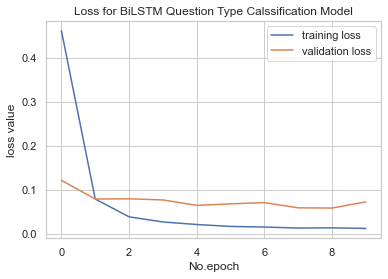

In [16]:
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.title('Loss for BiLSTM Question Type Calssification Model')
plt.ylabel('loss value')
plt.xlabel('No.epoch')
plt.legend(loc = "upper right")
plt.show()

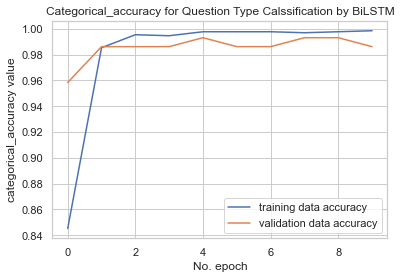

In [17]:
plt.plot(history.history['categorical_accuracy'], label = 'training data accuracy')
plt.plot(history.history['val_categorical_accuracy'], label = 'validation data accuracy')
plt.title('Categorical_accuracy for Question Type Calssification by BiLSTM')
plt.ylabel('categorical_accuracy value')
plt.xlabel('No. epoch')
plt.legend(loc = "lower right")
plt.show()

In [18]:
model.save('BiLSTM.h5')

In [19]:
new_model = load_model('BiLSTM.h5')

# <font color="#007bff"><b>8- Test The Model </b></font>

In [20]:
new_model.save_weights("Model Weights/weights")

In [21]:
print("Evaluate on test data")
results = new_model.evaluate(X_test, test_labels)
print("Test loss: ", results[0])
print("Test Accuracy:", results[1])
print("Generate pridictions for all samples")
rounded_predictions = new_model.predict(X_test)
predict_results = rounded_predictions.argmax(axis = 1)

Evaluate on test data
11/11 [==============================] - 2s 60ms/step - loss: 0.0748 - categorical_accuracy: 0.9789
Test loss:  0.07479823380708694
Test Accuracy: 0.9788519740104675
Generate pridictions for all samples


In [22]:
test_data['predict_label']= predict_results
test_data['predict_label']= np.where((test_data.predict_label==0), 0,test_data.predict_label)
test_data['predict_label']= np.where((test_data.predict_label==1), 1,test_data.predict_label)
test_data['predict_label']= np.where((test_data.predict_label==2), 2,test_data.predict_label)
test_data['predict_label']= np.where((test_data.predict_label==3), 3,test_data.predict_label)

#print(test_data.predict_results)
labels = [0,1,2,3]
print(classification_report(test_data['label'].tolist(),test_data['predict_label'].tolist(),labels=labels))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97        72
           1       0.96      0.98      0.97       109
           2       1.00      0.98      0.99        50
           3       0.99      0.99      0.99       100

    accuracy                           0.98       331
   macro avg       0.98      0.98      0.98       331
weighted avg       0.98      0.98      0.98       331



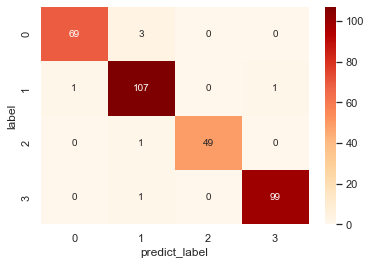

In [23]:
import seaborn as sn
data = {'label':    [0, 1, 2, 3],
        'predict_label': [0, 1, 2, 3]
        }

df = pd.DataFrame(data, columns=['label','predict_label'])
confusion_matrix = pd.crosstab(test_data['label'], test_data['predict_label'], rownames=['label'], colnames=['predict_label'])
sn.heatmap(confusion_matrix, annot=True, cmap = 'OrRd',fmt='g')
plt.savefig('confusion_matrix.png')
plt.show()

# <font color="#007bff"><b>Make some predictions </b></font>
Take some samples from the test dataset and inspect some individual predictions, to ensure that things are sensible.

In [24]:
test_data=test_data[['Question']+['Answer']+['label']+['predict_label']]
test_data

Question  \
0                        የአእምሮ ጤና ማለት ምን ማለት   
1     የአንድ ጤነኛ ሠዉ ትክክለኛ የደም ዉሥጥ የሥኳር መጠን ሥንት   
2                   ልጆች ሥንት ወር ጡት ዲወሥዱ ይመከራል   
3                          የደም ግፊት መንሥኤ ምንድን   
4                       የአእምሮ ህመም ማለት ምን ማለት   
..                                       ...   
326            ኤች.አይ.ቪ የማይተላለፍባቸው መንገዶች ዘርዝር   
327      ደም ግፊት ካለብን ተመራጭ ያልሆኑ ምግቦች ምንምን ናቸዉ   
328                የአልማዝ ባለጭራ ምልክቶች ምንምን ናቸዉ   
329                         ታይፎይድ መንሥኤዉ ምንድን   
330                    የታይፎይድ በሽታ ህክምናዉ ምንድን   

                                                Answer  label  predict_label  
0    የአእምሮ ጤና ማለት እምቅ ችሎታን ለማውጣት፤ በስራ ውጤታማ ለመሆን፤ ለማ...      0              0  
1                                ከ70 ሚግ እስከ 100 ሚሊ ግራም      2              2  
2    ጤናማ ህፃናት እስከ 6 ወር ድረስ ዉሃ፣ ጭማቂም ይሁን ሌላ ፈሳሾችም ቢሆ...      2              1  
3    የኩላሊት ችግር ካለ, የታይሮይድ ችግር ካለ የደም ስር ላይ ከውልደት ጀም...      1              1  
4    የአዕምሮ ህመም ማለት ከተለመደዉና ትክክለኛ ከሚበለዉ የአስተሳሰብ ፤የስሜ...      0              0  
..                                                 ...    ...            ...  
326                        አብሮ በመስራት፣ አብሮ በመብላትና በመጠጣት      3              3  
327                              ቀይ ሥጋ፣ ስኳር፣ ጨው፣ አልኮል       3              3  
328  ሽፍታው ውኃ ቋጥሮ በጣም የሚያም ነው፤ አብዛኛውን ጊዜ በጀርባ፣ በማጅራት...      3              3  
329  ህመሙ የሚከሰተዉ ሳልሞኔላ ታይፊ በሚባል የባክቴሪ አይነት ሲሆን ህመሙ ከ...      1              1  
330  የታይፎይድ ሕክምና ፈሳሾችን እና ኤሌክትሮላይቶችን እንዲሁም ዝቅተኛ ደረጃ...      1              1  

[331 rows x 4 columns]

In [146]:
def getResults(questions, func):
    def getResult(q):
        answer, score, prediction = func(q)
        return [q, prediction, answer, score]
    return pd.DataFrame(list(map(getResult, questions)), columns=["Question", "Prediction", "Answer", "Score"])
test_data = [
    "የኩላሊት ጠጠር ማለት ምን ማለት ነዉ?",
    "የቲቢ በሽታ ምልክቱ ምንድን ነዉ?",
    "አንድ ጤነኛ ሰዉ በቀን መዉሰድ የሚገባዉ የዉሀ መጠን ስንት ነዉ?",
    "አስምን የሚያስነሱ አለርጅዎችን ዘርዝር",   
    "የኢትዮጵያ ዋና ከተማ ማን ናት?"
]

In [147]:
from Levenshtein import ratio
def getApproximateAnswer(q):
    max_score = 0
    answer = ""
    prediction = ""
    for idx, row in train_data.iterrows():
        score = ratio(row["Question"], q)
        if score >= 0.9:
            return row["Answer"], score, row["Question"]
        elif score > max_score:
            max_score = score
            answer = row["Answer"]
            prediction = row["Question"]
    if max_score > 0.5:
        return answer, max_score, prediction
    return "መልስ የለም", None, "መልስ የለም"
getResults(test_data, getApproximateAnswer)

Question  \
0                   የኩላሊት ጠጠር ማለት ምን ማለት ነዉ?   
1                      የቲቢ በሽታ ምልክቱ ምንድን ነዉ?   
2  አንድ ጤነኛ ሰዉ በቀን መዉሰድ የሚገባዉ የዉሀ መጠን ስንት ነዉ?   
3                   አስምን የሚያስነሱ አለርጅዎችን ዘርዝር   
4                       የኢትዮጵያ ዋና ከተማ ማን ናት?   

                             Prediction  \
0                  የኩላሊት ጠጠር ማለት ምን ማለት   
1                     የቲቢ በሽታ ምልክቱ ምንድን   
2   አንድ ጤነኛ ሠዉ በቀን መዉሠድ ገባዉ የዉሀ መጠን ሥንት   
3                አሥምን ያሥነሡ አለርጅወችን ዘርዝር   
4                               መልስ የለም   

                                              Answer     Score  
0  የኩላሊት ጠጠር ማለት በኩላሊትዎ ውስጥ ከሚፈጠሩ ማዕድናት እና ጨዎች የተ...  0.888889  
1  ሁለት ሳምንትና ከዚያ በላይ ለሆነ ጊዜ የዘለቀ ሳል ነው፡፡ ሳሉ አክታ ያ...  0.871795  
2  አንድ ጤነኛ ሰዉ በቀን መዉሰድ የሚገባዉ የዉሀ መጠን ለወንዶች እስከ 3 ...  0.831169  
3  ጉንፋን፣የሲጋራና የማገዶ ጭስ፣የአየር ብክለት አቧራ፣ቅዝቃዜ ወይም የአየር...  0.765957  
4                                            መልስ የለም       NaN

In [ ]:
**********************************************************

# <font color="#007bff"><b>Ask Question </b></font>

In [178]:

question_orig= input("እባክወትን የሚፈልጉትን ጥያቄ ያስገቡ\n")
print("\nUser Query:", question_orig)


እባክወትን የሚፈልጉትን ጥያቄ ያስገቡ
የኢትዮጵያ ዋና ከተማ ማን ናት?

User Query: የኢትዮጵያ ዋና ከተማ ማን ናት?


In [179]:
#train_data=pd.read_excel(r"data/train_data.xlsx")
#print(len(train_data))
#train_data

import nltk
import re
import pre_process as stem

def preprocess_questions(question):
    result = []
    for txt in question_orig:
        result = [nltk.word_tokenize(question_orig)]
        cleaned_question = stem.per_process(result)
    return question

def get_preprocessed_questions(train_data):
    sents=train_data[["Question"]]
    cleaned_questions=[]
    
    for index,row in train_data.iterrows():
        cleaned=preprocess_questions(row["Question"])
        cleaned_questions.append(cleaned)
    return cleaned_questions


cleaned_questions=get_preprocessed_questions(train_data)

def getWordVec (word, amharic_word2vec):
    samp=amharic_word2vec['ህመም']
    vec=[0]*len(samp)
    try:
        vec=amharic_word2vec[word]
    except:
        vec=[0]*len(samp)
    return (vec)

def getPhraseEmbedding(phrase,embeddingmodel):
    samp=getWordVec('ህመም', embeddingmodel)
    vec=numpy.array([0]*len(samp))
    den=0
    for word in phrase.split():
        #print(word)
        den=den+1
        vec=vec+numpy.array(getWordVec(word,embeddingmodel))
    #vec=vec/den
    #return (vec.tolist())
    return vec.reshape(1,-1)

import numpy
sent_embeddings=[]
for sent in cleaned_questions:
    sent_embeddings.append(getPhraseEmbedding(sent,amharic_word2vec))
question_embedding=getPhraseEmbedding(question_orig,amharic_word2vec)


import sklearn
from sklearn.metrics.pairwise import cosine_similarity
#from amseg.amharicRomanizer import AmharicRomanizer as romanizer

def HealthcareQA(question_embedding, sentence_embeddings, AHQ, sentences):
    max_sim=-1
    index_sim=-1
    for index, answer_embedding in enumerate(sentence_embeddings):
        sim=cosine_similarity(answer_embedding, question_embedding)[0][0]
        #print(index, sim, sentences[index])
        if sim>max_sim:
            max_sim=sim
            index_sim=index
            
    print('\n')
    print('ጥያቄ: ',question_orig)
    #romanized = romanizer.romanize(question)
    #print('User Question: ',romanized)
    print('-------------------------------------------')
   # print('\n')
    if(max_sim>0.2):
        print('Similarity: ', max_sim)
        print('Closest question found: ', AHQ.iloc[index_sim,0])
        print('Answer: ',AHQ.iloc[index_sim,3])
        print('Question Type: ' , AHQ.iloc[index_sim,1])
    else:
        print('Answer not found')


In [180]:
HealthcareQA(question_embedding, sent_embeddings,train_data,cleaned_questions)



ጥያቄ:  የኢትዮጵያ ዋና ከተማ ማን ናት?
-------------------------------------------
Similarity:  0.39732064878627077
Closest question found:   የመጀመሪያ ወር ክፍለ ጊዜ ምንድን
Answer:  የሆርሞን ለውጦች በሰውነት ውስጥ ያሉትን ሁሉንም የሰውነት ክፍሎች ይነካል፡፡ 
Question Type:  Description


In [ ]:
**********************************************************